In [3]:
# merge all the census files.  

import pandas as pd

In [4]:
# this section merges the NC data from all 5 census years (25 year span)

folder = 'C:/Users/szums/AIBootCampPrime/AgProject3/NASSData/'

NC2002 = pd.read_pickle(folder + 'NC2002.pkl')
print(f'read picklefile 2002 with {len(NC2002)} rows.')

NC2007 = pd.read_pickle(folder + 'NC2007.pkl')
print(f'read picklefile 2007 with {len(NC2007)} rows.')


NC2012 = pd.read_pickle(folder + 'NC2012.pkl')
print(f'read picklefile 2012 with {len(NC2012)} rows.')


NC2017 = pd.read_pickle(folder + 'NC2017.pkl')
print(f'read picklefile 2017 with {len(NC2017)} rows.')


NC2022 = pd.read_pickle(folder + 'NC2022.pkl')
print(f'read picklefile 2022 with {len(NC2022)} rows.')


dfallyears = pd.concat([NC2002,NC2007,NC2012,NC2017,NC2022], axis=0, ignore_index=True)
print(f'merged file now has {len(dfallyears)} rows.')
if len(dfallyears) == len(NC2002)+len(NC2007)+len(NC2012)+len(NC2017)+len(NC2022):
    print('row count makes sense')
else:
    print('better check the rowcount!') 

read picklefile 2002 with 100988 rows.
read picklefile 2007 with 174009 rows.
read picklefile 2012 with 194460 rows.
read picklefile 2017 with 256052 rows.
read picklefile 2022 with 173506 rows.
merged file now has 899015 rows.
row count makes sense


In [6]:
dfallyears.to_pickle(folder + 'NCAllYears.pkl')

# pare this down to the statewide values only
df = dfallyears[dfallyears['LOCATION_DESC'] == 'NORTH CAROLINA']

# get rid of empty columns
display(df.columns)
df = df.drop(['SOURCE_DESC','STATE_ANSI','STATE_FIPS_CODE','STATE_ALPHA','STATE_NAME','WATERSHED_CODE','LOAD_TIME','COUNTRY_CODE','COUNTRY_NAME','LOCATION_DESC','AGG_LEVEL_DESC'],axis='columns')

df = df.dropna(axis='columns')

df.head(10)

Index(['SOURCE_DESC', 'SECTOR_DESC', 'GROUP_DESC', 'COMMODITY_DESC',
       'CLASS_DESC', 'PRODN_PRACTICE_DESC', 'UTIL_PRACTICE_DESC',
       'STATISTICCAT_DESC', 'UNIT_DESC', 'SHORT_DESC', 'DOMAIN_DESC',
       'DOMAINCAT_DESC', 'AGG_LEVEL_DESC', 'STATE_ANSI', 'STATE_FIPS_CODE',
       'STATE_ALPHA', 'STATE_NAME', 'WATERSHED_CODE', 'COUNTRY_CODE',
       'COUNTRY_NAME', 'LOCATION_DESC', 'YEAR', 'FREQ_DESC', 'BEGIN_CODE',
       'END_CODE', 'REFERENCE_PERIOD_DESC', 'LOAD_TIME', 'VALUE', 'CV_%'],
      dtype='object')

,SECTOR_DESC,GROUP_DESC,COMMODITY_DESC,CLASS_DESC,PRODN_PRACTICE_DESC,UTIL_PRACTICE_DESC,STATISTICCAT_DESC,UNIT_DESC,SHORT_DESC,DOMAIN_DESC,DOMAINCAT_DESC,YEAR,FREQ_DESC,BEGIN_CODE,END_CODE,REFERENCE_PERIOD_DESC,VALUE
76521,CROPS,FIELD CROPS,BARLEY,ALL CLASSES,ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,AREA HARVESTED,ACRES,BARLEY - ACRES HARVESTED,TOTAL,NOT SPECIFIED,2002,ANNUAL,0,0,YEAR,"15,664"
76522,CROPS,FIELD CROPS,BARLEY,ALL CLASSES,ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,PRODUCTION,BU,"BARLEY - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,2002,ANNUAL,0,0,YEAR,"934,962"
76523,CROPS,FIELD CROPS,BARLEY,ALL CLASSES,IRRIGATED,ALL UTILIZATION PRACTICES,AREA HARVESTED,ACRES,"BARLEY, IRRIGATED - ACRES HARVESTED",TOTAL,NOT SPECIFIED,2002,ANNUAL,0,0,YEAR,82
76524,CROPS,FIELD CROPS,BEANS,"DRY EDIBLE, LIMA",ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,AREA HARVESTED,ACRES,"BEANS, DRY EDIBLE, LIMA - ACRES HARVESTED",TOTAL,NOT SPECIFIED,2002,ANNUAL,0,0,YEAR,93
76525,CROPS,FIELD CROPS,BEANS,"DRY EDIBLE, LIMA",ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,PRODUCTION,CWT,"BEANS, DRY EDIBLE, LIMA - PRODUCTION, MEASURED...",TOTAL,NOT SPECIFIED,2002,ANNUAL,0,0,YEAR,"2,833"
76526,CROPS,FIELD CROPS,BEANS,"DRY EDIBLE, LIMA",IRRIGATED,ALL UTILIZATION PRACTICES,AREA HARVESTED,ACRES,"BEANS, DRY EDIBLE, LIMA, IRRIGATED - ACRES HAR...",TOTAL,NOT SPECIFIED,2002,ANNUAL,0,0,YEAR,(D)
76527,CROPS,VEGETABLES,BEANS,SNAP,ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,AREA HARVESTED,ACRES,"BEANS, SNAP - ACRES HARVESTED",TOTAL,NOT SPECIFIED,2002,ANNUAL,0,0,YEAR,"9,433"
76528,CROPS,FIELD CROPS,COTTON,ALL CLASSES,ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,AREA HARVESTED,ACRES,COTTON - ACRES HARVESTED,TOTAL,NOT SPECIFIED,2002,ANNUAL,0,0,YEAR,"924,097"
76529,CROPS,FIELD CROPS,COTTON,UPLAND,ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,AREA HARVESTED,ACRES,"COTTON, UPLAND - ACRES HARVESTED",TOTAL,NOT SPECIFIED,2002,ANNUAL,0,0,YEAR,"924,097"
76530,CROPS,FIELD CROPS,COTTON,UPLAND,IRRIGATED,ALL UTILIZATION PRACTICES,AREA HARVESTED,ACRES,"COTTON, UPLAND, IRRIGATED - ACRES HARVESTED",TOTAL,NOT SPECIFIED,2002,ANNUAL,0,0,YEAR,"23,674"


In [7]:
def profiledata(dfname):

    rowcount = len(dfname)

    for thiscol in dfname.columns:
        #if thiscol.find('FILLER'): continue
        print('\nLooking at column',thiscol)
        # count nulls
        nulls_in_col = dfname[thiscol].isnull().sum()
        val_counts = dfname[thiscol].value_counts()
        print('this column has',nulls_in_col,'out of',rowcount,'nulls, and',len(val_counts),'distinct values.')
        val_i = 0
        for thisval in val_counts.index:
            this_vc_string = (f'{thisval} : {val_counts[thisval]}')
            print(this_vc_string)
            val_i += 1
            if val_i > 20: break

profiledata(df)




Looking at column SECTOR_DESC
this column has 0 out of 215267 nulls, and 5 distinct values.
DEMOGRAPHICS : 86432
ECONOMICS : 61507
CROPS : 42630
ANIMALS & PRODUCTS : 22358
ENVIRONMENTAL : 2340

Looking at column GROUP_DESC
this column has 0 out of 215267 nulls, and 18 distinct values.
FARMS & LAND & ASSETS : 43738
FIELD CROPS : 35357
EXPENSES : 34286
INCOME : 21489
LIVESTOCK : 19420
PRODUCERS : 14603
VEGETABLES : 11527
OPERATORS : 9243
FRUIT & TREE NUTS : 8611
POULTRY : 6087
HORTICULTURE : 3536
SPECIALTY : 2827
ENERGY : 1731
AQUACULTURE : 894
DAIRY : 871
ANIMAL TOTALS : 525
CROP TOTALS : 520
IRRIGATION : 2

Looking at column COMMODITY_DESC
this column has 0 out of 215267 nulls, and 236 distinct values.
AG LAND : 18429
PRODUCERS : 13012
FARM OPERATIONS : 11953
CATTLE : 10972
INCOME, NET CASH FARM : 8541
AG SERVICES : 7246
OPERATORS, PRINCIPAL : 6444
COMMODITY TOTALS : 6417
LABOR : 5708
HOGS : 5345
CORN : 4857
INTEREST : 4537
INCOME, FARM-RELATED : 4532
CHICKENS : 4032
VEGETABLE TOTALS 

In [8]:
# WE HAVE CLEAN DATA AT THE STATE LEVEL (NOT COUNTY) FROM ALL 5 FILES, SO LET'S SAVE THAT

df.to_pickle(folder+'NCAllYearsStateLevel.pkl')

In [9]:

dfNew = df[(df['DOMAIN_DESC'] == 'TOTAL') & ((df['SHORT_DESC'] == 'FARM OPERATIONS - ACRES OPERATED') | (df['SHORT_DESC'] == 'FARM OPERATIONS - NUMBER OF OPERATIONS'))]\
    [['YEAR','SHORT_DESC','VALUE']]

dfNew.head()


,YEAR,SHORT_DESC,VALUE
79434,2002,FARM OPERATIONS - ACRES OPERATED,"9,079,001"
79503,2002,FARM OPERATIONS - NUMBER OF OPERATIONS,"53,930"
192781,2007,FARM OPERATIONS - ACRES OPERATED,"8,474,671"
192850,2007,FARM OPERATIONS - NUMBER OF OPERATIONS,"52,913"
375706,2012,FARM OPERATIONS - ACRES OPERATED,"8,414,756"


In [10]:
dfNew = dfNew = df[((df['SHORT_DESC'] == 'FARM OPERATIONS - ACRES OPERATED') | (df['SHORT_DESC'] == 'FARM OPERATIONS - NUMBER OF OPERATIONS'))]\
    [['YEAR','SHORT_DESC','VALUE','DOMAIN_DESC']]

dfNew2 = dfNew[dfNew['DOMAIN_DESC'] == "TOTAL"][['YEAR','SHORT_DESC','VALUE']]

dfNew2['VALUE'] = dfNew2['VALUE'].str.replace(',','')
dfNew2['VALUE'] = pd.to_numeric(dfNew2['VALUE'])


# now switch up rows for two columns.

# Separate acres and farmcount
acres = dfNew2.iloc[::2].reset_index(drop=True)
farmcount = dfNew2.iloc[1::2].reset_index(drop=True)

# Rename columns if needed
acres = acres.rename(columns={'VALUE': 'Acres'})
farmcount = farmcount.rename(columns={'VALUE': 'FarmCount'})

# Combine into a new DataFrame
new_df = pd.DataFrame({
    'YEAR': acres['YEAR'],
    'Acres': acres['Acres'],
    'FarmCount': farmcount['FarmCount']
})

# If you want to ensure the columns are in a specific order:
new_df = new_df[['YEAR', 'Acres', 'FarmCount']]

new_df.set_index('YEAR', inplace=True)

print(new_df)




        Acres  FarmCount
YEAR                    
2002  9079001      53930
2007  8474671      52913
2012  8414756      50218
2017  8430522      46418
2022  8128136      42817


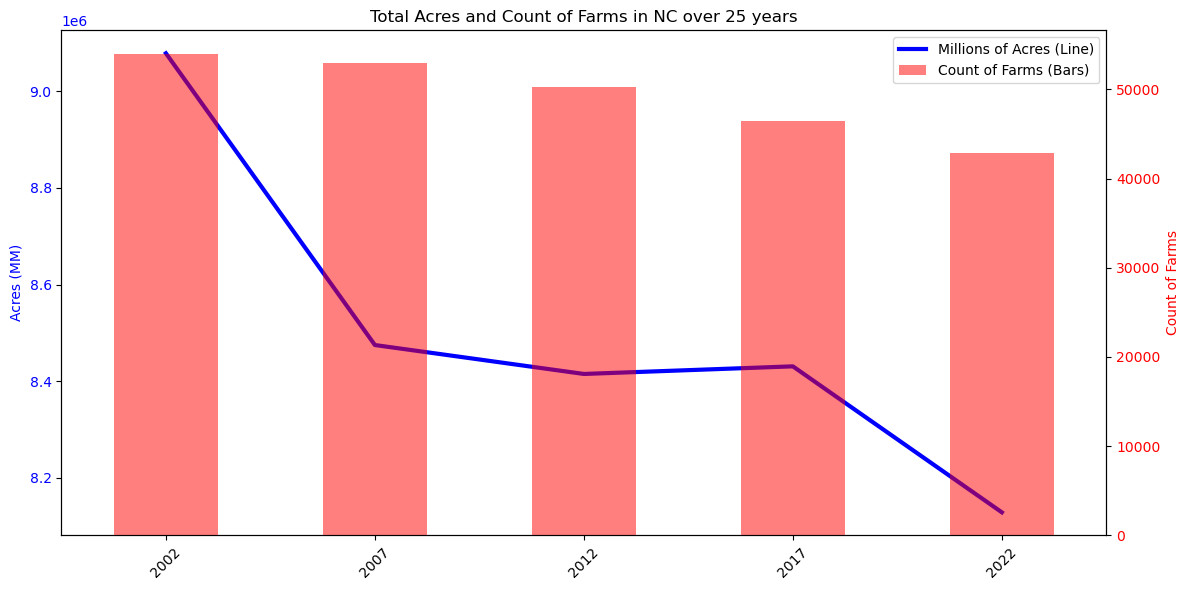

In [13]:
import matplotlib.pyplot as plt

df = new_df.copy()

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create x-axis positions for the bars
x = range(len(df))

# Plot the first column as a line on the left y-axis
line = ax1.plot(x, df['Acres'], color='blue', label='Millions of Acres (Line)',linewidth=3)
ax1.set_ylabel('Acres (Millions)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the second column as bars on the right y-axis
bars = ax2.bar(x, df['FarmCount'], alpha=0.5, color='red', label='Count of Farms (Bars)',width=.5)
ax2.set_ylabel('Count of Farms', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set the x-axis ticks and labels
ax1.set_xticks(x)
ax1.set_xticklabels(df.index, rotation=45, ha='center')

# Adjust the x-axis range to center the labels under the bars
ax1.set_xlim(-0.5, len(df) - 0.5)

# Set the title
plt.title('Total Acres and Count of Farms in NC over 25 years')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()
